# Synchrotron Radiation

## History

Synchrotron radiation was first observed in GE synchrotron on 1946.
<img src=ge_synchrotron.png width=400><img src=sr_paper_1947.png width=400>


Then it was realized as the major obstacle to achieve higher electron energy in a ring accelerator.  Since the radiation power is scaled as:
\begin{equation}
P\sim \frac{\gamma^4}{\rho^2}
\end{equation}

## The Lienard- Wiechert Potential

We are interested in the E-M field generated by a moving charged particle  Suppose the charge particle has determined trajectory $\mathbf{r}_0(t_r)$, the time $t_r$ is the time at the charged particle.  The observer located at $P$ as position $\mathbf{r}=\mathbf{r}_0(t_r) + \mathbf{R}(t_r)$.  The time $t$ is related to $t_r$ by:
\begin{align}
t_r+\frac{\left|\mathbf{R}(t_r)\right|}{c}=t
\end{align}

$t_r$ is the retarded time.  The time derivative of $t_r$ is given by:
\begin{align}
d(t_r+\frac{\left|\mathbf{R}(t_r)\right|}{c})&=dt\\
\left(1+\frac{d}{dt_r}\frac{\left|\mathbf{R}(t_r)\right|}{c}\right)dt_r&=dt
\end{align}

from $R^2=\mathbf{R}\cdot\mathbf{R}$, we have
\begin{align}
\frac{dR}{dt_r}=-\frac{\mathbf{v}\cdot\mathbf{R}}{R}
\end{align}

So the $t_r$ 's derivative is :
\begin{align}
\frac{dt_r}{dt}=\frac{1}{1-\boldsymbol{\beta}\cdot\mathbf{\hat{R}}}
\end{align}

From the wave form of the Maxwell equation of one particle:
\begin{align}
(-\nabla^2 +\frac{1}{c^2}\frac{\partial^2}{\partial t^2}) \phi &= \frac{\rho}{\varepsilon_0} \\
(-\nabla^2 +\frac{1}{c^2}\frac{\partial^2}{\partial t^2}) \mathbf A &= \mu_0 \mathbf J
\end{align}


Here, the charged density and current density are 
\begin{align}
\rho&=q\delta(\mathbf{r}-\mathbf{r}_0(t_r)) \\
\mathbf{J}&=q\mathbf{r}(t_r)\delta(\mathbf{r}-\mathbf{r}_0(t_r))
\end{align}

The scalar and vector potential are 
\begin{align}
\phi(\mathbf{r}, t) &= \frac{1}{4\pi \epsilon_0} \iint \frac{q\delta^3(\mathbf{r'} - \mathbf{r}_s(t'))}{|\mathbf{r} - \mathbf{r}'|} \delta(t' - t_r') \, dt' \, d^3\mathbf{r}'\\
\mathbf{A}(\mathbf{r}, t) &= \frac{\mu_0}{4\pi} \iint \frac{q\mathbf{v}_s(t') \delta^3(\mathbf{r'} - \mathbf{r}_s(t'))}{|\mathbf{r} - \mathbf{r}'|} \delta(t' - t_r') \, dt' \, d^3\mathbf{r}'
\end{align}

Then the potentials reduces to 
\begin{align}
\phi(\mathbf{r}, t) &= \frac{1}{4\pi \epsilon_0} \frac{q}{\left(1-\boldsymbol{\beta}\cdot\mathbf{\hat{R}}\right)\left|\mathbf{r}-\mathbf{r_0}\right|} \\
\mathbf{A}(\mathbf{r}, t) &= \frac{\mu_0}{4\pi } \frac{q\mathbf{v}}{\left(1-\boldsymbol{\beta}\cdot\mathbf{\hat{R}}\right)\left|\mathbf{r}-\mathbf{r_0}\right|}
\end{align}

Both are evaluated at time $t_r$.



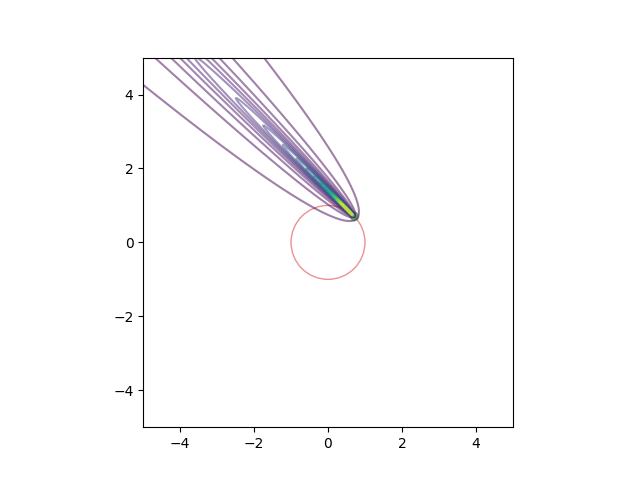

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

def cir_rtd_potential(theta, radius=1, boundary=10, ngrid=300, beta_amp=1):
    position=np.array([np.cos(theta), np.sin(theta)])*radius
    velocity=np.array([np.cos(theta+np.pi/2), np.sin(theta+np.pi/2)])*beta_amp
    x=np.linspace(-boundary/2.0, boundary/2.0, ngrid)
    y=np.linspace(-boundary/2.0, boundary/2.0, ngrid)
    xx,yy=np.meshgrid(x,y)
    rdist=np.sqrt((xx-position[0])**2+(yy-position[1])**2)
    betadotr=(velocity[0]*(xx-position[0])+velocity[1]*(yy-position[1]))/rdist
    phi=1/(1-betadotr)/rdist
    
    return xx, yy, phi
r=1
theta=3*np.pi/12
xx, yy, phi=cir_rtd_potential(theta, radius=r, beta_amp=.999)
fig, ax=plt.subplots()
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
circle = plt.Circle( (0., 0. ), r ,fill = False, color='C3', alpha=0.5 )
 

ax.add_artist(circle)
ax.set_aspect('equal')
mask=xx*xx+yy*yy>1.3*r*r
ax.contour(xx, yy, phi,np.linspace(np.min(phi[mask]**0.5), np.max(phi[mask]**0.5),20, endpoint=True)**2, alpha=0.5)
ax.scatter([r*np.cos(theta),], [r*np.sin(theta),], c='C2', alpha=0.5)


The fields therefore can be calculated as from 
\begin{align}
\mathbf{E}&=-\boldsymbol {\nabla} \phi -\frac{\partial \mathbf{A}}{\partial t}\\
\mathbf{B}&=\boldsymbol {\nabla} \times \mathbf{A}
\end{align}

To evaluate these differential operations, it is important to know the following relations:

\begin{align}
\boldsymbol {\nabla} \left|\mathbf{r}-\mathbf{r_0}\right| &= \boldsymbol{\nabla} t_r \frac{d |\mathbf{r}-\mathbf{r_0}|}{d t_r} + \mathbf{\hat{R}} \\
&= -\boldsymbol{\nabla} t_r c\boldsymbol{\beta}\cdot\mathbf{\hat{R}} + \mathbf{\hat{R}}
\end{align} 

And we know that 
\begin{align}
\boldsymbol{\nabla} t_r + \frac{1}{c}{\boldsymbol \nabla} |\mathbf{r}-\mathbf{r_0}| &= 0 \\
\boldsymbol{\nabla} t_r (1-\boldsymbol{\beta}\cdot\mathbf{\hat{R}}) &= -\frac{1}{c}\mathbf{\hat{R}}  \nonumber\\
\end{align}

Therefore we can gather all useful relations below:
\begin{align}
\frac{dt_r}{dt}&=\frac{1}{1-\boldsymbol{\beta}\cdot\mathbf{\hat{R}}}\\
\boldsymbol{\nabla} t_r &= -\frac{1}{c}\frac{\mathbf{\hat{R}}}{1-\boldsymbol{\beta}\cdot\mathbf{\hat{R}}} \\
\boldsymbol {\nabla} \left|\mathbf{r}-\mathbf{r_0}\right| &= \frac{\mathbf{\hat{R}}}{\left(1 - \mathbf{\hat{R}}\cdot{\boldsymbol \beta}_s\right)}
\end{align} 



The the electric field gives:
\begin{align}
\mathbf{E}=\frac{q}{4\pi\epsilon_0\gamma^2}\frac{\mathbf{\hat{R}}-\boldsymbol{\beta}}{R^2\left(1-\boldsymbol{\beta}\cdot\mathbf{\hat{R}}\right)^3} + 
\frac{q}{4\pi\epsilon_0 c} \mathbf{\hat{R}}\times\frac{\left(\mathbf{\hat{R}}-\boldsymbol{\beta}\right)\times\boldsymbol{\dot{\beta}}}{R\left(1-\boldsymbol{\beta}\cdot\mathbf{\hat{R}}\right)^3}
\end{align}

The magnetic field gives:
\begin{align}
\mathbf{B}=\mathbf{\hat{R}}\times\mathbf{E}/c
\end{align}

The first term does not involve acceleration, which described a 'uniformly' moving charge (see "The classical Theory of Fields" by Landau and Lifshitz).  After a Lorentz transform, tt is just the static electric field from a charged particle.  The emitted energy from this term is zero.  Therefore only the contribution from the second term 'radiates' out, which is consequence of $\boldsymbol{\dot{\beta}}$, or acceleration.

## Radiation Field and Flux

The Poynting vector of the radiation term gives (using the fact $\mathbf{\hat{R}}\cdot \mathbf{E}=0$):
\begin{align}
\mathbf{S}&=\frac{1}{\mu_0}\mathbf{E}\times\mathbf{B}\\
&=\frac{1}{\mu_0}\mathbf{E}\times(\mathbf{\hat{R}}\times\mathbf{E}/c)\\
&=\frac{1}{\mu_0c}E^2\mathbf{\hat{R}}
\end{align}

The power dissipates in the unit solid angle gives, ***evalutated as source*** is :
\begin{align}
\frac{dP}{d\Omega}&=R^2\mathbf{S}\cdot \mathbf{\hat{R}} \frac{dt}{dt_r}\\
&=\left(1 - \mathbf{\hat{R}}\cdot{\boldsymbol \beta}_s\right) \frac{R^2 E^2}{\mu_0 c}\\
&=\frac{q^2}{16\pi^2\epsilon_0 c}
\frac{\Bigg(\mathbf{\hat{R}}\times\Big(\left(\mathbf{\hat{R}}-\boldsymbol{\beta}\right)\times\boldsymbol{\dot{\beta}}\Big)\Bigg)^2}
{\left(1-\boldsymbol{\beta}\cdot\mathbf{\hat{R}}\right)^5}
\end{align}

### Non-relativistic limit

In this limit, the approximation $\boldsymbol{\beta} \ll 1 $ is made, which leads to:

* $\mathbf{\hat{R}}-\boldsymbol{\beta} \approx \mathbf{\hat{R}}$
* $1-\boldsymbol{\beta}\cdot\mathbf{\hat{R}} \approx 1$

Then the power flux gives:
\begin{align}
\frac{dP}{d\Omega}&=\frac{q^2}{16\pi^2\epsilon_0 c}
\Big(\mathbf{\hat{R}}\times\left(\mathbf{\hat{R}}\times\boldsymbol{\dot{\beta}}\right)\Big)^2\nonumber\\
&=\frac{q^2}{16\pi^2\epsilon_0 c^3} \mathbf{\dot{v}}^2 \left(\sin\theta\right)^2
\end{align}

Here we establish the spherical coordinate system along $\mathbf{\dot{v}}$ and the angle between $\mathbf{\dot{v}}$ and $\mathbf{\hat{R}}$ is $\theta$.  Therefore the total power is simply:
\begin{align}
P&=\int\frac{dP}{d\Omega}d\Omega \\
&=\frac{q^2}{16\pi^2\epsilon_0 c^3} \mathbf{\dot{v}}^2 
\int_0^{2\pi} d\phi \int_0^{\pi} \left(\sin\theta\right)^2 \sin \theta d\theta \nonumber\\
&=\frac{1}{4\pi\epsilon_0} \frac{2q^2}{3c^3} \mathbf{\dot{v}}^2
\end{align}

Which reduces to the Larmor's formula

### General Case

In accelerator, we are interested in relativistic case.  We start with 

\begin{align}
\frac{dP}{d\Omega}&=\frac{q^2}{16\pi^2\epsilon_0 c}
\frac{\Bigg(\mathbf{\hat{R}}\times\Big(\left(\mathbf{\hat{R}}-\boldsymbol{\beta}\right)\times\boldsymbol{\dot{\beta}}\Big)\Bigg)^2}
{\left(1-\boldsymbol{\beta}\cdot\mathbf{\hat{R}}\right)^5} \nonumber \\
&=\frac{q^2}{16\pi^2\epsilon_0 c}
\frac{\Big(\left(\mathbf{\hat{R}}\cdot\boldsymbol{\dot{\beta}}\right)\left(\mathbf{\hat{R}}-\boldsymbol{\beta}\right)-\left(1-\mathbf{\hat{R}}\cdot\boldsymbol{\beta}\right)\boldsymbol{\dot{\beta}}\Big)^2}
{\left(1-\boldsymbol{\beta}\cdot\mathbf{\hat{R}}\right)^5}
\end{align}

We need to establish a spherical coordinate system to go further.  Let's assume $\boldsymbol{\beta}=\beta(0,0,1)$, $\boldsymbol{\dot{\beta}}=\dot{\beta}(\sin\Theta,0,\cos\Theta)$ and $\mathbf{\hat{R}}=(\sin\theta\cos\phi,\sin\theta\sin\phi,\cos\theta)$

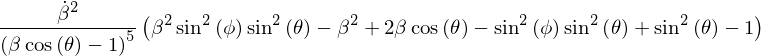

In [14]:
import sympy
sympy.init_printing()
bth,th,ph=sympy.symbols(r"\Theta, \theta, \phi")
ba,bda=sympy.symbols(r"\beta, \dot{\beta}")
ref=sympy.physics.vector.ReferenceFrame('N')
beta=1*ref.z*ba
beta_dot=(sympy.sin(bth)*ref.x+sympy.cos(bth)*ref.z)*bda
r_hat=sympy.sin(th)*sympy.cos(ph)*ref.x+sympy.sin(th)*sympy.sin(ph)*ref.y+sympy.cos(th)*ref.z
temp1=r_hat.dot(beta_dot)*(r_hat-beta)-(1-r_hat.dot(beta))*beta_dot
temp1=sympy.simplify(temp1.magnitude()*temp1.magnitude())
temp2=(1-r_hat.dot(beta))*(1-r_hat.dot(beta))
temp2*=temp2
temp2*=(1-r_hat.dot(beta))
ang_dep=temp1/temp2
sympy.simplify(ang_dep.subs(bth,sympy.pi/2).subs(ph,ph))

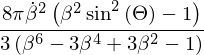

In [33]:
int1=sympy.integrate(temp1/temp2, (ph,0,2*sympy.pi))
u,v=sympy.symbols(r"u,v")
int2=sympy.simplify(int1.subs(th, sympy.acos(u)))
#int2=sympy.simplify(int2.subs(u, (1+v)/ba))
intg1=sympy.simplify(sympy.integrate(int2, u))
sympy.simplify(intg1.subs(u,1)-intg1.subs(u,-1))

\begin{align}
P&=\int\frac{dP}{d\Omega}d\Omega \\
&=\frac{q^2}{16\pi^2\epsilon_0 c}\frac{8 \pi \dot{\beta}^{2} \left(\beta^{2} \sin^{2}{\left (\Theta \right )} - 1\right)}{3 \left(\beta^{6} - 3 \beta^{4} + 3 \beta^{2} - 1\right)} \nonumber \\
&=\frac{1}{4\pi\epsilon_0}\frac{2q^2}{3c}\gamma^6 \dot{\beta}^2\left(1-\beta^{2} \sin^{2}{\left (\Theta \right )}\right)\nonumber \\
&=\frac{1}{4\pi\epsilon_0}\frac{2q^2}{3c}\gamma^6 \dot{\beta}^2\left(1-\beta^{2} \frac{\left|\boldsymbol{\beta} \times \boldsymbol{\dot\beta}\right|^2}{\beta^2 \dot{\beta}^2}\right)\nonumber \\
&=\frac{1}{4\pi\epsilon_0}\frac{2q^2}{3c}\gamma^6 \left(\dot{\beta}^2- \left|\boldsymbol{\beta} \times \boldsymbol{\dot\beta}\right|^2\right)
\end{align}

We have derived the total power that emitted by an accelerated beam.  The first term in the parentheses is the contribution from beam acceleration. The second term is the contribution from the bending term.

#### Radiation in linac

In a linac, the total radiation power is:
\begin{align}
P=\frac{1}{4\pi\epsilon_0}\frac{2q^2}{3c}\gamma^6\dot{\beta}^2
\end{align}

It is more convenient to convert the change of velocity to the energy.  From $\beta^2\gamma^2=\gamma^2-1$, we have 
\begin{align}
\beta\dot{\beta}=\gamma^{-3}\dot\gamma=\frac{1}{mc^2\gamma^3}\frac{dE}{dx}\frac{dx}{dt}=\frac{\beta}{mc\gamma^3}\frac{dE}{dx}
\end{align}

Therefore:
\begin{align}
P&=\frac{1}{4\pi\epsilon_0}\frac{2q^2}{3c}\gamma^6\frac{1}{m^2c^2\gamma^6}\left(\frac{dE}{dx}\right)^2 \nonumber \\
&=\frac{1}{4\pi\epsilon_0}\frac{2q^2c}{3(mc^2)^2}\left(\frac{dE}{dx}\right)^2 \\
&\approx 0.288 eV/s \times\left(\frac{\text{Energy gradient [MeV/m]}}{\text{Beam rest energy [MeV]}}\right)^2
\end{align}

The angular dependence becomes:
\begin{align}
\frac{dP}{d\Omega}\sim \frac{\dot{\beta}^{2} \sin^{2}{\left (\theta \right )}}{\left(- \beta \cos{\left (\theta \right )} + 1\right)^{5}}
\end{align}

when the beam is ultra-relativistic, $\beta\approx 1-\frac{1}{2\gamma^2}$, $\sin\theta\approx\theta$, and $\cos\theta\approx 1-\theta^2/2$, therefore, the angular distribution becomes:
\begin{align}
\frac{dP}{d\Omega}\sim \frac{\dot{\beta}^{2} \theta^2}{\left(\theta^2+\frac{1}{\gamma^2}\right)^{5}}
\end{align}

The maximum angle locates at $\theta\sim\frac{1}{\gamma}$.


<IPython.core.display.Javascript object>


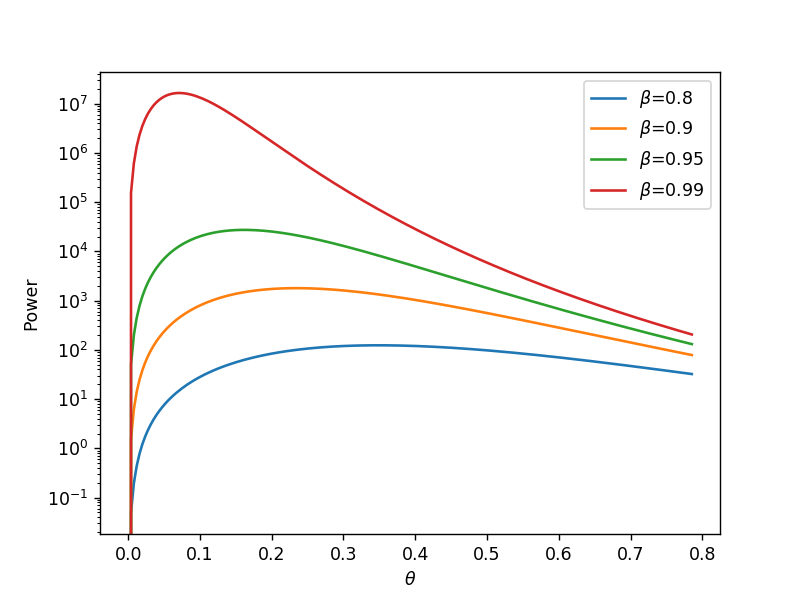

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
fig,ax=plt.subplots()
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"Power")
def power_dis(theta, beta):
    return np.sin(theta)*np.sin(theta)/np.power(1.0-beta*np.cos(theta),5.0)
theta=np.linspace(0,np.pi/4,200)
betas=[0.8, 0.9,0.95,0.99]
for be in betas:
    ax.semilogy(theta, power_dis(theta,be), label=r'$\beta$={}'.format(be))
ax.legend(loc='best')

<a list of 7 text.Text objects>

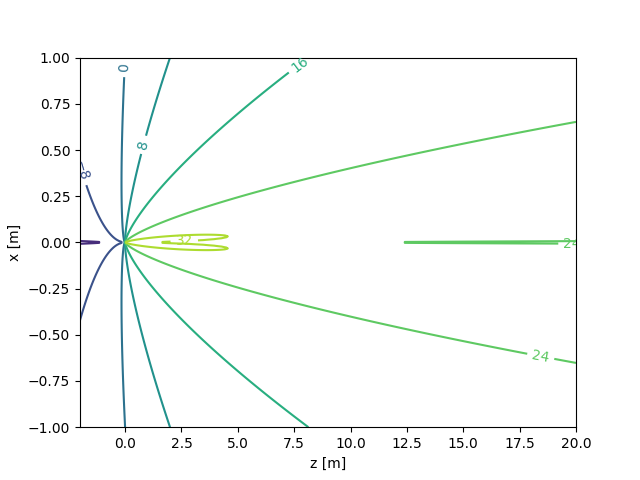

In [10]:
import matplotlib.pyplot as plt
import numpy as np

beta=0.9999
z=np.linspace(-2,20.0,1000)
x=np.linspace(-1.0,1.0,400)

zz,xx=np.meshgrid(z,x)
theta=np.arctan2(xx,zz)
r2=zz*zz+xx*xx
srp=np.sin(theta)*np.sin(theta)/np.power(1.0-beta*np.cos(theta),5.0)/r2

fig,ax=plt.subplots()
ax.set_ylabel("x [m]")
ax.set_xlabel("z [m]")
con=ax.contour(zz,xx,np.log(srp))
ax.clabel(con)


#### Radiation in dipole

In the magnetic field, the velocity only changes its direction, $\boldsymbol{\dot\beta}\perp\boldsymbol{\beta}$, and the amplitude is
\begin{align}
\dot\beta=\frac{c\beta^2}{\rho}
\end{align}

Then the total power is:
\begin{align}
P&=\frac{1}{4\pi\epsilon_0}\frac{2q^2}{3c}\gamma^6 \dot{\beta}^2\left(1-\beta^{2} \sin^{2}{\left (\Theta \right )}\right)\\
&=\frac{1}{4\pi\epsilon_0}\frac{2q^2}{3}\frac{c\gamma^4\beta^4}{\rho^2}
\end{align}

We try to re-express the power in terms of the classical radius $r_0$ and radiation constant $C_\gamma$, who are defined as:
\begin{align}
r_0=\frac{1}{4\pi\epsilon_0}\frac{q^2}{mc^2}
\end{align}

\begin{align}
C_\gamma=\frac{4\pi}{3}\frac{r_0}{\left(mc^2\right)^3}
\end{align}

Then
\begin{align}
P=\frac{C_\gamma}{2\pi}c\beta^4 \frac{E^4}{\rho^2}
\end{align}

For different particle species the constant $C_\gamma$ gives:
\begin{align}
C_\gamma=
\begin{cases}
8.85\times10^{-5} \text{ m/(GeV)}^3 & \text{Electron}\\
4.84\times10^{-14} \text{ m/(GeV)}^3 & \text{Muon}\\
7.78\times10^{-18} \text{ m/(GeV)}^3 & \text{Proton}\\
\end{cases}
\end{align}

The total energy radiated of the ring will be:
\begin{align}
U_r&=\int_{0}^{T}Pdt \\
&\approx\frac{C_\gamma}{2\pi}\beta^4 E^4\oint \frac{1}{\rho^2}ds
\end{align}

The angular distribution can be found as: 
\begin{align}
\frac{dP}{d\Omega}
&\sim\frac{\dot{\beta}^{2}}{\left(1- \beta \cos{\left (\theta \right )}\right)^{5}} 
\left(-\beta^{2} \sin^{2}{\left (\phi \right )} \sin^{2}{\left (\theta \right )} + \beta^{2} - 2 \beta \cos{\left (\theta \right )} + \sin^{2}{\left (\phi \right )} \sin^{2}{\left (\theta \right )} + \cos^{2}{\left (\theta \right )}\right)  \\
&\sim\frac{\dot{\beta}^{2}}{\left(1- \beta \cos{\left (\theta \right )}\right)^{5}}
\left(\frac{\sin^{2}{\left (\phi \right )} \sin^{2}{\left (\theta \right )}}{\gamma^2} + \left(\beta-\cos\theta\right)^2\right)
\end{align}

70.71244595191452


<a list of 6 text.Text objects>

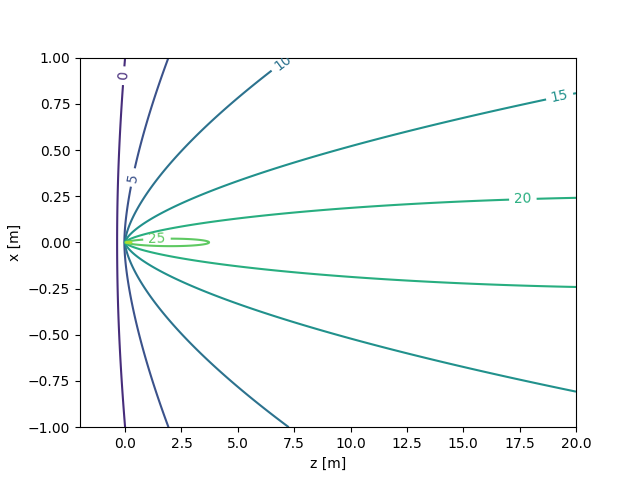

In [12]:
import matplotlib.pyplot as plt
import numpy as np

beta=0.9999
gamma=1/np.sqrt(1-beta*beta)
print(gamma)
z=np.linspace(-2,20.0,1000)
x=np.linspace(-1.0,1.0,1000)


zz,xx=np.meshgrid(z,x)
theta=np.arctan2(xx,zz)
r2=zz*zz+xx*xx

sphi=1
sphith=sphi*np.sin(theta)/gamma
cth=np.cos(theta)
srp=(sphith*sphith+(beta-cth)*(beta-cth))/np.power(1.0-beta*cth,5.0)/r2


fig,ax=plt.subplots()
ax.set_ylabel("x [m]")
ax.set_xlabel("z [m]")
con=ax.contour(zz,xx,np.log(srp))
ax.clabel(con)




In the relativistic limit, we have 

\begin{align}
\frac{dP}{d\Omega}&\sim\frac{\dot{\beta}^{2}}{\left(1- \beta \cos{\left (\theta \right )}\right)^{5}}
\left(\frac{\sin^{2}{\left (\phi \right )} \sin^{2}{\left (\theta \right )}}{\gamma^2} + \left(\beta-\cos\theta\right)^2\right)\nonumber\\
&\sim\frac{\dot{\beta}^{2}}{\left(\frac{1}{\gamma^2}+\theta^2\right)^{5}}
\left(\frac{4\sin^{2}{\left (\phi \right )} \theta^2 }{\gamma^2} + \left(\frac{1}{\gamma^2}-\theta^2\right)^2\right)
\end{align}

The power will drop significantly when $\theta \gg 1/\gamma$.

## Radiation Spectrum

### Qualitative analysis

<img src=sr_ering.png width=400>
We are interested in an electron storage ring. The retarded time interval of shining the SR cone to a far field target is
\begin{align}
\Delta t_r \approx \frac{\rho\theta}{\beta c}\sim \frac{\rho}{\gamma c}
\end{align}

Convert to the observer's time:
\begin{align}
\Delta t=\frac{dt}{dt_r}\Delta t_r \sim \frac{\rho}{\gamma^3 c}
\end{align}

Therefore the frequency content is approximated with:
\begin{align}
\omega\sim 1/\Delta t\sim \frac{\gamma^3 c}{\rho}\sim \gamma^3 \omega_0
\end{align}


### Quantitative analysis

To study the frequency spectrum of the synchrotron radiation, we return to the flux, evaluated at the ***observation point*** gives
\begin{align}
\frac{dP}{d\Omega}&=R^2\mathbf{S}\cdot \mathbf{\hat{R}} \\
&=\frac{1}{\mu_0 c}R^2 E^2
\equiv G(t)^2
\end{align}

We define an amplitude radiation function which is the square root of the flux:
\begin{align}
\mathbf{G}(t)=\sqrt{\frac{1}{\mu_0 c}} R (t) \mathbf{E}
\end{align}

Then the frequency content is given by Fourier transform:
\begin{align}
\mathbf{G}(\omega)
&=\frac{1}{\sqrt{2\pi}}\int\mathbf G(t)e^{i\omega t}dt\\
&=\frac{q}{4\pi\epsilon_0 c}\sqrt{\frac{1}{2\pi\mu_0 c}}\int \mathbf{\hat{R}}\times\frac{\left(\mathbf{\hat{R}}-\boldsymbol{\beta}\right)\times\boldsymbol{\dot{\beta}}}{\left(1-\boldsymbol{\beta}\cdot\mathbf{\hat{R}}\right)^3}e^{i\omega t}dt \nonumber\\
&=\sqrt{\frac{q^2}{32\pi^3\epsilon_0 c}}\int \mathbf{\hat{R}}\times\frac{\left(\mathbf{\hat{R}}-\boldsymbol{\beta}\right)\times\boldsymbol{\dot{\beta}}}{\left(1-\boldsymbol{\beta}\cdot\mathbf{\hat{R}}\right)^2}e^{i\omega \left(t_r+R/c\right)}dt_r
\end{align}

Now we have to use far field approximation to proceed.  We know that $\mathbf{R}=\mathbf{r}-\mathbf{r}_0$.  The far field approximation implies $\left|\mathbf{r}\right|\gg\left|\mathbf{r}_0\right|$, then

\begin{align}
R&=\left|\mathbf{r}-\mathbf{r}_0\right| \nonumber\\
&=r\left|\mathbf{\hat{r}}-\mathbf{r}_0/r\right|\nonumber\\
&\approx r(1-\mathbf{\hat{r}}\cdot\mathbf{r}_0/r)\nonumber\\
&\approx r-\mathbf{\hat{R}}\cdot\mathbf{r}_0
\end{align}

Then the frequency spectrum becomes
\begin{align}
\mathbf{G}(\omega)
&=\sqrt{\frac{q^2}{32\pi^3\epsilon_0 c}}e^{i\omega r/c}
\int \mathbf{\hat{R}}\times\frac{\left(\mathbf{\hat{R}}-\boldsymbol{\beta}\right)\times\boldsymbol{\dot{\beta}}}{\left(1-\boldsymbol{\beta}\cdot\mathbf{\hat{R}}\right)^2}e^{i\omega \left(t_r-\mathbf{\hat{R}}\cdot\mathbf{r}_0/c\right)}dt_r \\
&=-i\omega\sqrt{\frac{q^2}{32\pi^3\epsilon_0 c}}e^{i\omega r/c}
\int \mathbf{\hat{R}}\times \left(\mathbf{\hat{R}} \times \boldsymbol{\beta}\right)
e^{i\omega \left(t_r-\mathbf{\hat{R}}\cdot\mathbf{r}_0/c\right)}dt_r
\end{align}

Here we use the relation below and integration by part:
\begin{align}
\frac{d}{dt_r}\left(\frac{\mathbf{\hat{R}}\times \left(\mathbf{\hat{R}} \times \boldsymbol{\beta}\right)}
{1-\boldsymbol{\beta}\cdot\mathbf{\hat{R}}}\right)=
\mathbf{\hat{R}}\times\frac{\left(\mathbf{\hat{R}}-\boldsymbol{\beta}\right)\times\boldsymbol{\dot{\beta}}}{\left(1-\boldsymbol{\beta}\cdot\mathbf{\hat{R}}\right)^2}
\end{align}

Here we found the frequency spectrum of the radiation amplitude.  However, what we can measure is the total radiation energy per solid angle:
\begin{align}
\frac{dU}{d\Omega}&=\int_{-\infty}^{\infty} \frac{dP}{d\Omega} dt \\
&=\int_{-\infty}^{\infty} \left|\mathbf{G}(t)\right|^2 dt=\int_{-\infty}^{\infty} \left|\mathbf{G}(\omega)\right|^2 d\omega    \qquad(\text{Parseval's theorem})\\
&=2\int_{0}^{\infty} \left|\mathbf{G}(\omega)\right|^2 d\omega \equiv \int_{0}^{\infty} \frac{dI}{d\omega} d\omega
\qquad(\text{Real signal})
\end{align}

Therefore we will then focus on the spectrum of the energy:

\begin{align}
\frac{dI}{d\omega}&=2\left|\mathbf{G}(\omega)\right|^2\\
&=\frac{q^2\omega^2}{16\pi^3\epsilon_0 c} \left|
\int \mathbf{\hat{R}}\times \left(\mathbf{\hat{R}} \times \boldsymbol{\beta}\right)
e^{i\omega \left(t_r-\mathbf{\hat{R}}\cdot\mathbf{r}_0/c\right)}dt_r \right|^2
\end{align}

Now we concentrate on the spectrum of an electron storage ring with coordinate shown below:
<img src=sr_coordinate.png width=400>
and assume $\mathbf{r}_0$ is along a ring with radius $\rho$, therefore:
\begin{align}
\mathbf{r}_0=\rho\Big(1-\cos\left(\omega_0t_r\right), 0, \sin\left(\omega_0t_r\right)\Big)
\end{align}
Here, $\omega_0$ is the angular revolution frequency.  The velocity therefore gives

\begin{align}
\boldsymbol{\beta}=\beta\Big(\sin\left(\omega_0t_r\right), 0, \cos\left(\omega_0t_r\right)\Big)
\end{align}

And the unit vector $\mathbf{\hat{R}}$ in spherical coordinate is written as:
\begin{align}
\mathbf{\hat{R}}=\left(\sin\theta\cos\phi, \sin\theta\sin\phi, \cos\theta\right)
\end{align}
We may only consider the tangential plane ($y$-$z$), without losing generality, viz. $\phi=\pi/2$.  Therefore 

\begin{align}
\mathbf{\hat{R}}=\left(0, \sin\theta, \cos\theta\right)
\end{align}
Also we use the following assumption:
* small cone size $\theta\sim1/\gamma \ll 1$
* short retarded time interval $\omega_0t_r \ll 1$

We have:
\begin{align}
\mathbf{\hat{R}}\times \left(\mathbf{\hat{R}} \times \boldsymbol{\beta}\right) 
&=\mathbf{\hat{R}}(\mathbf{\hat{R}}\cdot\boldsymbol{\beta}) - \boldsymbol{\beta} \\
&=\beta \left(-\omega_0 t_r, \theta, 0\right)
\end{align}

and
\begin{align}
\omega(t_r-\mathbf{\hat{R}}\cdot \mathbf{r}_0/c)
&=\omega\left(t_r- \frac{\rho}{c}\sin\left(\omega_0t_r\right) \cos\theta\right)\nonumber\\
&=\omega\left(t_r- \frac{\beta}{\omega_0}\sin\left(\omega_0t_r\right) \cos\theta\right)\nonumber\\
&=\omega\left(t_r- \frac{1}{\omega_0}\left(1-\frac{1}{2\gamma^2}\right)\left(\omega_0t_r-\frac{\omega_0^3t_r^3}{6}\right) \left(1-\frac{\theta^2}{2}\right)\right)\nonumber\\
&=\omega\left(t_r- \left(1-\frac{1}{2\gamma^2}\right)\left(t_r-\frac{\omega_0^2t_r^3}{6}\right) \left(1-\frac{\theta^2}{2}\right)\right)\nonumber\\
&=\frac{\omega}{2}\left(\left(\theta^2+\frac{1}{\gamma^2}\right)t_r+\frac{\omega_0^2t_r^3}{3} \right)\\
\end{align}

Now, we redefine the variable $a\equiv\gamma\theta\sim 1$, and further define:
\begin{align}
x&\equiv\sqrt{\frac{\omega_0^2 t_r^2}{\theta^2+\frac{1}{\gamma^2}}}
=\frac{\gamma\omega_0 t_r}{\left(1+a^2\right)^{1/2}} \\
\xi&\equiv\frac{\omega}{3}\frac{\left(1+a^2\right)^{3/2}}{\gamma^3\omega_0}=\frac{\omega}{2\omega_c}\left(1+a^2\right)^{3/2}
\end{align}

Here we define the ***critical frequency*** of synchrotron radiation:
\begin{align}
\omega_c\equiv\frac{3}{2}\gamma^3 \omega_0\approx\frac{3\gamma^3c}{2\rho} 
\end{align}

Then, we have:

\begin{align}
\omega(t_r-\mathbf{\hat{R}}\cdot \mathbf{r}_0/c)=\frac{3}{2}\xi
\left(x+\frac{x^3}{3}\right)
\end{align}

The spectrum of the energy flux finally reduces to:
\begin{align}
\frac{dI}{d\omega}
&=\frac{q^2\omega^2}{16\pi^3\epsilon_0 c} \left|
\int \mathbf{\hat{R}}\times \left(\mathbf{\hat{R}} \times \boldsymbol{\beta}\right)
e^{i\omega \left(t_r-\mathbf{\hat{R}}\cdot\mathbf{r}_0/c\right)}dt_r \right|^2\nonumber\\
&=\frac{q^2\omega^2}{16\pi^3\epsilon_0 c} \left|
\int \beta \left(-\omega_0t_r\hat{x}+\theta\hat{y}\right)
\exp\Bigg(i\frac{3}{2}\xi\left(x+\frac{x^3}{3}\right)\Bigg)dt_r
\right|^2\nonumber\\
&\equiv \frac{\beta^2 q^2\omega^2}{16\pi^3\epsilon_0 c} \left|
 \left(-{G}_x \hat{x}+ {G}_y \hat{y})\right) 
\right|^2
\end{align}



Clearly, the total frequency spectrum of the radiation intensity consists the contribution from two transverse components ${G}_x$ and ${G}_y$.  The integral yields the modified Bessel functions of the second kind:

\begin{align}
G_x&=\frac{1+a^2}{\omega_0 \gamma^2}\int x
\exp\Bigg(i\frac{3}{2}\xi\left(x+\frac{x^3}{3}\right)\Bigg)dx  = \frac{2}{\sqrt{3}} \frac{1+a^2}{\omega_0 \gamma^2} K_{2/3}(\xi)\\
G_y&=\frac{a\left(1+a^2\right)^{1/2}}{\omega_0 \gamma^2}\int
\exp\Bigg(i\frac{3}{2}\xi\left(x+\frac{x^3}{3}\right)\Bigg)dx = \frac{2}{\sqrt{3}} \frac{a\left(1+a^2\right)^{1/2}}{\omega_0 \gamma^2} K_{1/3}(\xi)
\end{align}


Then the frequency spectrum becomes
\begin{align}
\frac{dI}{d\omega}
&=\frac{\beta^2 q^2\omega^2}{16\pi^3\epsilon_0 c} \left|
 \left(-{G}_x \hat{x}+ {G}_y \hat{y})\right) 
\right|^2 \nonumber\\
&=\frac{\beta^2 q^2\omega^2}{16\pi^3\epsilon_0 c} \frac{4}{3}\frac{1+a^2}{\omega_0^2\gamma^4} \left(\left(1+a^2\right)K_{2/3}^2(\xi)+a^2K_{1/3}^2(\xi)\right)
\end{align}

We are interest in the frequency range of the characteristic frequency of the SR.  Using the definition of  ***critical frequency***, $\omega_c=3\gamma^3\omega_0/2$:
\begin{align}
\frac{dI}{d\omega}
&=\frac{3q^2}{16\pi^3\epsilon_0 c} \frac{\omega^2}{\omega_c^2}\gamma^2\left({1+a^2}\right)^2 \left(K_{2/3}^2(\xi)+\frac{a^2}{1+a^2}K_{1/3}^2(\xi)\right)\\
&=\frac{3q^2}{4\pi^3\epsilon_0 c} \xi^2\gamma^2\left({1+a^2}\right)^{-1} \left(K_{2/3}^2(\xi)+\frac{a^2}{1+a^2}K_{1/3}^2(\xi)\right)
\end{align}

The two terms of modified Bessel function corresponds to the contribution from the horizontal and vertical polarized radiation field respectively.  
We see that in the bending plane, $a=\gamma\theta=0$, the radiation is purely horizontal polarized.

<IPython.core.display.Javascript object>


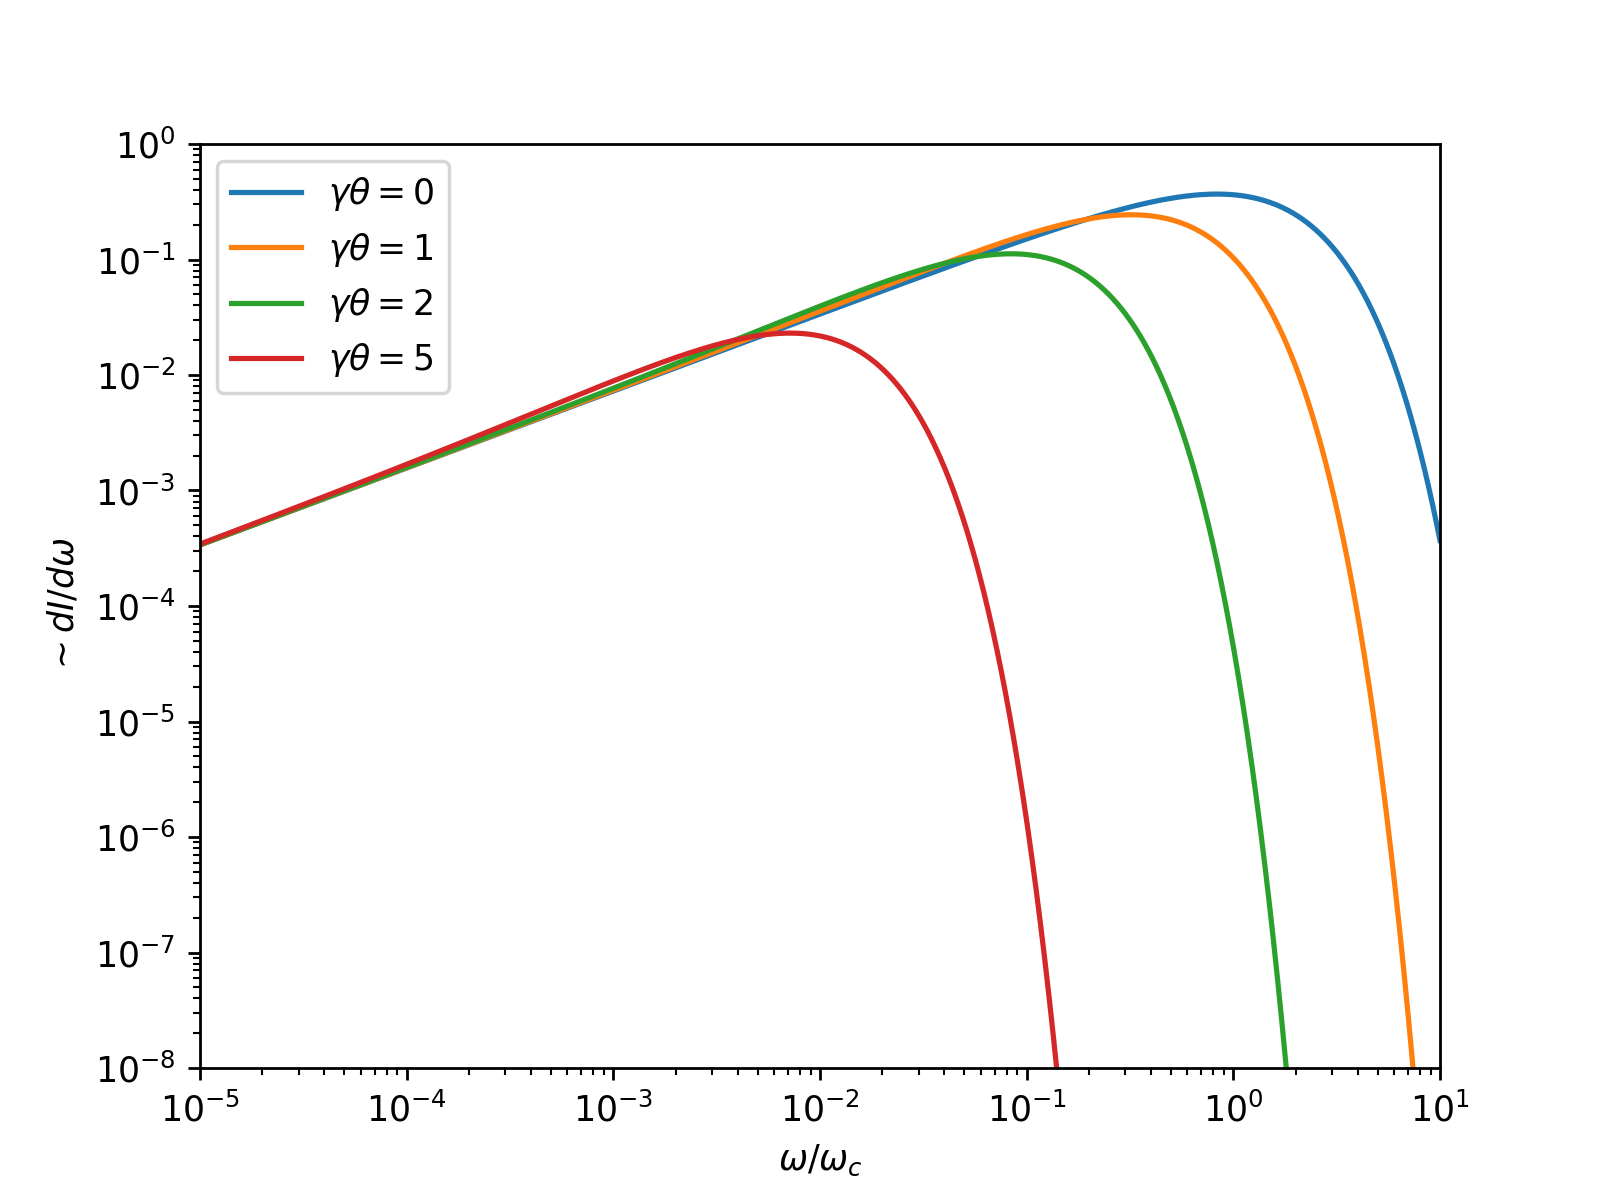

In [102]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special as special
%matplotlib notebook


fig, ax=plt.subplots()
ax.set_xlim(1e-5,10)
ax.set_ylim(1e-8,1)
ax.set_xlabel(r'$\omega/\omega_c$')
ax.set_ylabel(r'$\sim dI/ d\omega$')
omega_ratio=np.logspace(-6,1,1000)
for a in [0,1,2,5]:
    xi=omega_ratio/2.0*(1+a*a)**1.5
    k23=special.kv(2.0/3,xi)
    k13=special.kv(1.0/3,xi)
    Igx=xi*xi*k23*k23
    Igy=xi*xi*k13*k13

    ax.loglog(omega_ratio, (Igx+a*a*Igy/(1+a*a))/(1+a*a), label=r'$\gamma\theta={}$'.format(a))
ax.legend(loc='best')

We see that the spectrum is broad band and sudden drops when the the frequency exceeds the critical frequency. 

Recall that:

\begin{align}
\frac{dU}{d\Omega}=\int_{0}^{\infty} \frac{dI}{d\omega} d\omega
\end{align}

Therefore, the energy spectrum can be achieved by integrating all solid angles:
\begin{align}
\frac{dU}{d\omega}
&=\int \frac{dI}{d\omega} d\Omega \nonumber\\
&=\frac{\sqrt{3}q^2}{4\pi\epsilon_0c}\gamma\frac{\omega}{\omega_c}
\int_{\omega/\omega_c}^{\infty}K_{5/3}(\xi)d\xi
\end{align}

By defining 
\begin{align}
S(\xi)=\frac{9\sqrt{3}}{8\pi}\xi\int_{\xi}^{\infty}K_{5/3}(\xi')d\xi'
\end{align}
which satisfy $\int_0^{\infty}S(\xi)d\xi=1$, we will rewrite the energy spectrum as:
\begin{align}
\frac{dU}{d\omega}
&=\frac{2q^2}{9\epsilon_0 c}\gamma S\left(\frac{\omega}{\omega_c}\right)
\end{align}

<IPython.core.display.Javascript object>


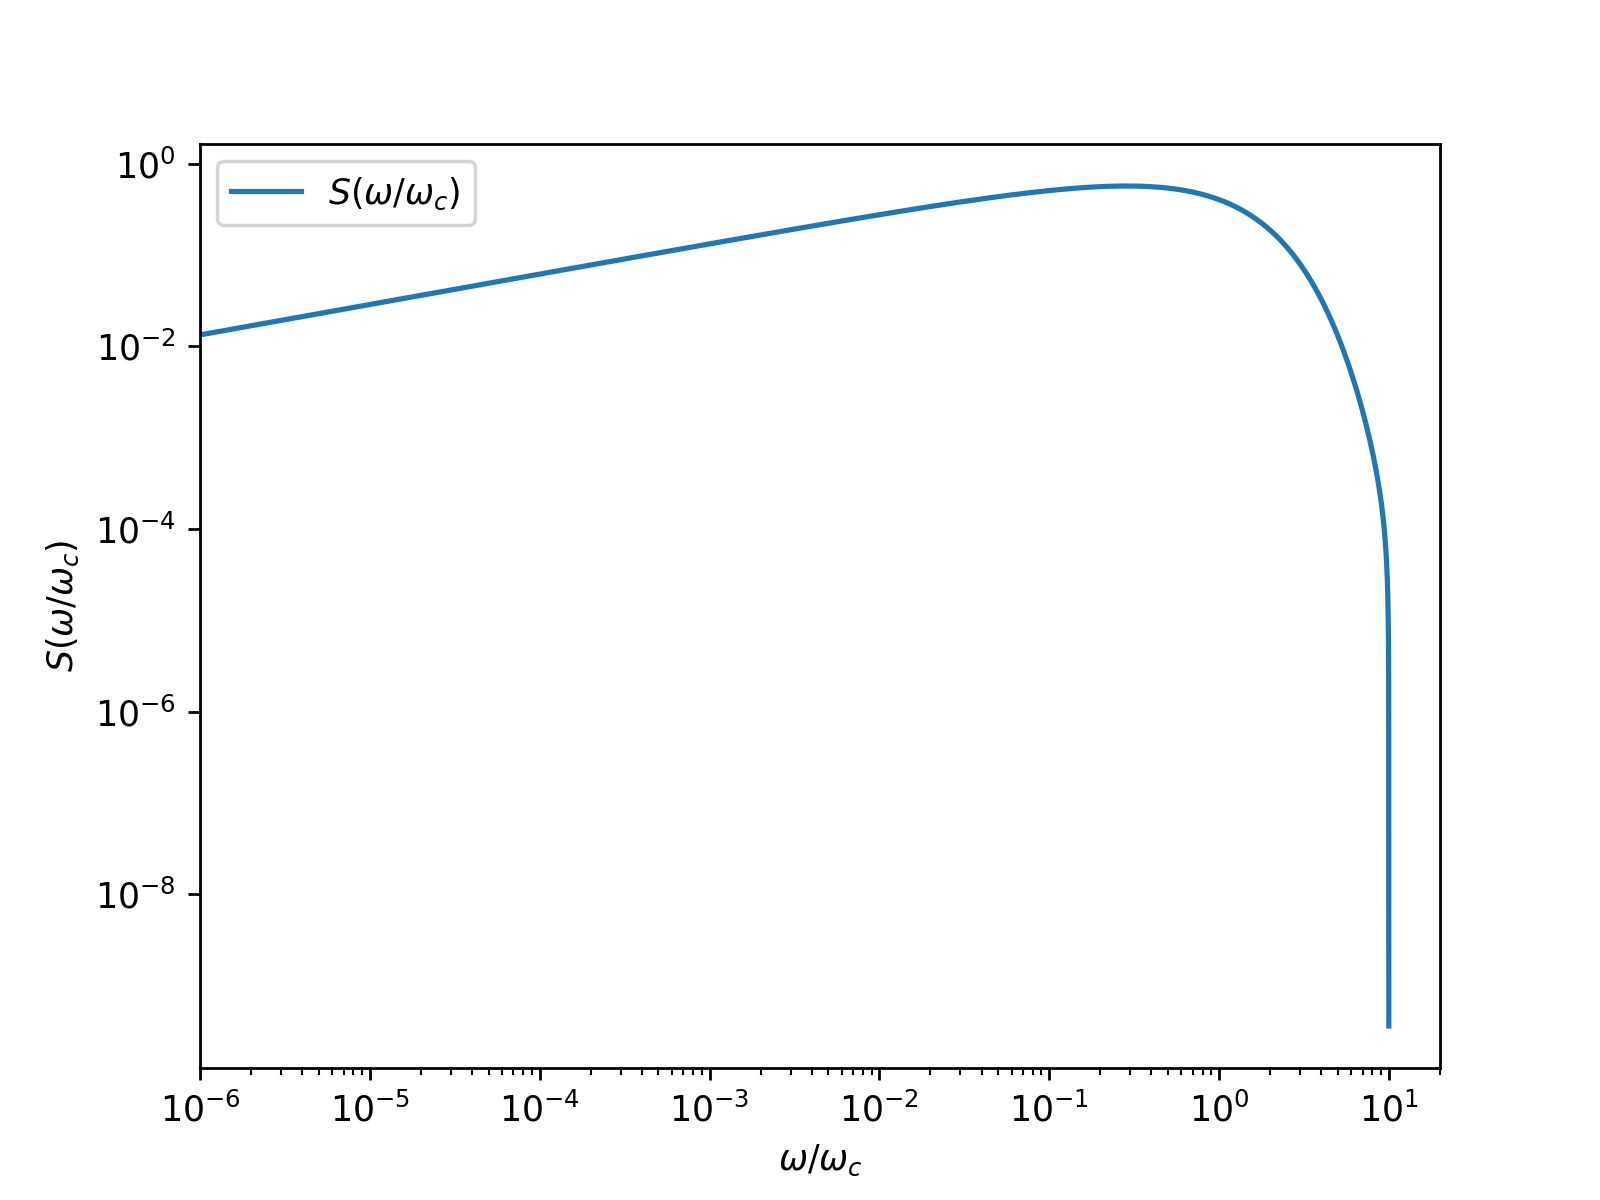

The integral of S function is: 0.9976699617994194


In [18]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special as special
import pickle
%matplotlib notebook

omega_ratio=np.logspace(-6,1,10001)
xi=np.sqrt((omega_ratio[:-1]*omega_ratio[1:]))
k53=special.kv(5.0/3,xi)
diff=np.diff(omega_ratio)
allsum=np.sum(k53*diff)
intg=allsum-np.cumsum(k53*diff)
s_xi=xi*intg*9*np.sqrt(3)/8/np.pi


int2=np.sum(s_xi*diff)

fig, ax=plt.subplots()
ax.set_xlim(1e-6,20)
#ax.set_ylim(1e-8,1)
ax.set_xlabel(r'$\omega/\omega_c$')
ax.set_ylabel(r'$S(\omega/\omega_c)$')
omega_ratio=np.logspace(-6,1,1000)
ax.loglog(xi, s_xi, label=r'$S(\omega/\omega_c)$')
ax.legend(loc='best')
print("The integral of S function is:", int2)

The total energy can be also attained from the frequency domain integration.
\begin{align}
U&=\int_0^{\infty}\frac{dU}{d\omega}d\omega\\
&=\frac{2q^2}{9\epsilon_0 c}\gamma \int_0^{\infty} S\left(\frac{\omega}{\omega_c}\right) d\omega \nonumber \\
&=\frac{2q^2}{9\epsilon_0 c}\gamma \omega_c\nonumber \\
&=\frac{q^2}{3\epsilon_0 \rho }\gamma^4 = \frac{2\pi\rho}{c}P
\end{align}

We return to the earlier SR power from time domain integral.


## Quantum Fluctuation

The photon emission in the SR process is a quantum effect.  The energy $u$ of the photon is related to its frequency by $u=\hbar\omega$  The photon number is found by:
\begin{align}
un(u)du=\frac{dU}{d\omega} d\omega
\end{align}

Therefore: the photon number density gives:
\begin{align}
n(u)
&=\frac{1}{\hbar^2\omega}\frac{dU}{d\omega}\\
&=\frac{1}{\hbar^2\omega_c^2}\frac{2q^2\omega_c}{9\epsilon_0 c}\gamma \frac{\omega_c}{\omega}S\left(\frac{\omega}{\omega_c}\right)\\
&=\frac{U_{SR}}{u_c^2}\frac{\omega_c}{\omega}S\left(\frac{\omega}{\omega_c}\right)
\end{align}

here $u_c=\hbar\omega_c$ is the critical photon energy. And using the integration fact:
\begin{align}
\int_0^{\infty}\frac{S(\xi)}{\xi}d\xi=\frac{15\sqrt{3}}{8}
\end{align}

We get the total emitted photon in one revolution gives:
\begin{align}
N&=\int n(u) du \\
&=\frac{15\sqrt{3}}{8}\frac{U_{SR}}{u_c} \nonumber\\
&=\frac{15\sqrt{3}}{8}\frac{q^2}{3\epsilon_0 \rho \hbar }\gamma\frac{2\rho}{3c}\nonumber\\
&=\frac{5\pi}{\sqrt{3}}\frac{q^2}{4\pi\epsilon_0  \hbar c }\gamma =\frac{5\pi}{\sqrt{3}}\alpha\gamma
\end{align}
Here $\alpha$ is the fine structure constant.  These photons emits randomly around one revolution.

The average emitted photon gives energy by
\begin{align}
\bar{u}=\frac{1}{N}\int_0^{\infty}u n(u) du = \frac{8}{15\sqrt{3}}u_c
\end{align}

And the variation gives by 
\begin{align}
\bar{u^2}=\frac{1}{N}\int_0^{\infty}u^2 n(u) du = \frac{11}{27}u_c^2
\end{align}


We can summarized the synchrotron radiation parameters's dependence on energy:

|Quantities| Power of energy|
|---------|-----------|
|Radiation Power (fix $\rho$)|$P\sim\gamma^4/\rho^2$|
|Radiation Power (fix field)|$P\sim\gamma^2 B^2$|
|Number of Photon| $N\sim \gamma$|
|Average photon energy| $\bar{u}\sim \gamma^3$|
|Photon energy variation | $\bar{u^2}\sim \gamma^6$|
|Accumulated photon energy variation | $\bar{Nu^2}\sim \gamma^7$|